# Lung cancer data exploration

In [1]:
# importación de datos y librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = "survey lung cancer.csv" # Ruta del dataset 

archivo = pd.read_csv(path) # Importación de datos de la ruta
df = pd.DataFrame(archivo) # Convertir los datos a un pandas DataFrame

# Transformación de datos binarios numéricos a etiquetas para exploración inicial
df.loc[:, 'SMOKING':'CHEST PAIN'] = df.loc[:, 'SMOKING':'CHEST PAIN'].replace({1: False, 2: True})

df.head() # Resumen de las primeras filas del dataset. 

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,False,True,True,False,False,True,False,True,True,True,True,True,True,YES
1,M,74,True,False,False,False,True,True,True,False,False,False,True,True,True,YES
2,F,59,False,False,False,True,False,True,False,True,False,True,True,False,True,NO
3,M,63,True,True,True,False,False,False,False,False,True,False,False,True,True,NO
4,F,63,False,True,False,False,False,False,False,True,False,True,True,False,False,NO


## Exploración inical de datos

### Tipos de datos

In [2]:
# Tipos de datos de las características
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                    bool
YELLOW_FINGERS             bool
ANXIETY                    bool
PEER_PRESSURE              bool
CHRONIC DISEASE            bool
FATIGUE                    bool
ALLERGY                    bool
WHEEZING                   bool
ALCOHOL CONSUMING          bool
COUGHING                   bool
SHORTNESS OF BREATH        bool
SWALLOWING DIFFICULTY      bool
CHEST PAIN                 bool
LUNG_CANCER              object
dtype: object

### Resumen estadístico

In [3]:
# Resumen estadístico por características
for col in df:
    print(f"{df[col].describe()}\n")

count     309
unique      2
top         M
freq      162
Name: GENDER, dtype: object

count    309.000000
mean      62.673139
std        8.210301
min       21.000000
25%       57.000000
50%       62.000000
75%       69.000000
max       87.000000
Name: AGE, dtype: float64

count      309
unique       2
top       True
freq       174
Name: SMOKING, dtype: object

count      309
unique       2
top       True
freq       176
Name: YELLOW_FINGERS, dtype: object

count       309
unique        2
top       False
freq        155
Name: ANXIETY, dtype: object

count      309
unique       2
top       True
freq       155
Name: PEER_PRESSURE, dtype: object

count      309
unique       2
top       True
freq       156
Name: CHRONIC DISEASE, dtype: object

count      309
unique       2
top       True
freq       208
Name: FATIGUE , dtype: object

count      309
unique       2
top       True
freq       172
Name: ALLERGY , dtype: object

count      309
unique       2
top       True
freq       172
Name: WHEEZ

### Visualización de datos

#### Histograma Participación por edad.

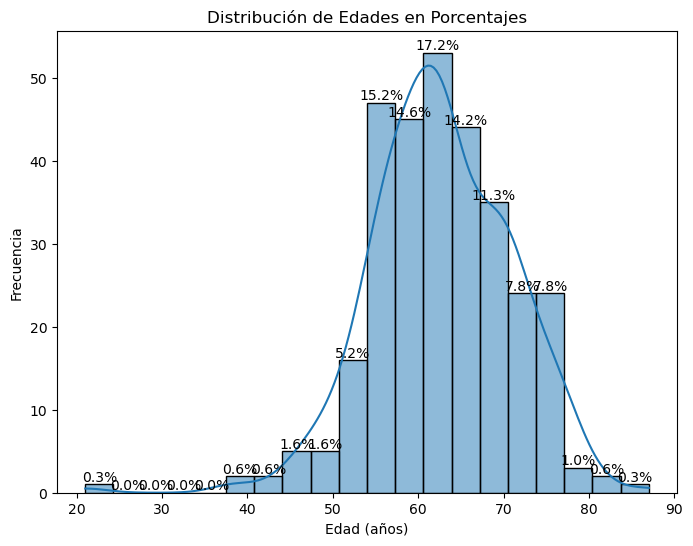

In [4]:
# Distribución de las edades de los participantes
plt.figure(figsize=(8, 6))
ax = sns.histplot(df['AGE'], bins=20, kde=True)

# Agregar etiquetas de porcentajes
total = len(df['AGE'])
for p in ax.patches:
    percentAGE = f'{(100 * p.get_height()/total):.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentAGE, (x, y), ha='center', va='bottom')

plt.title('Distribución de Edades en Porcentajes')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.show()

#### Histograma relación Edad vs Cáncer de Pulmón

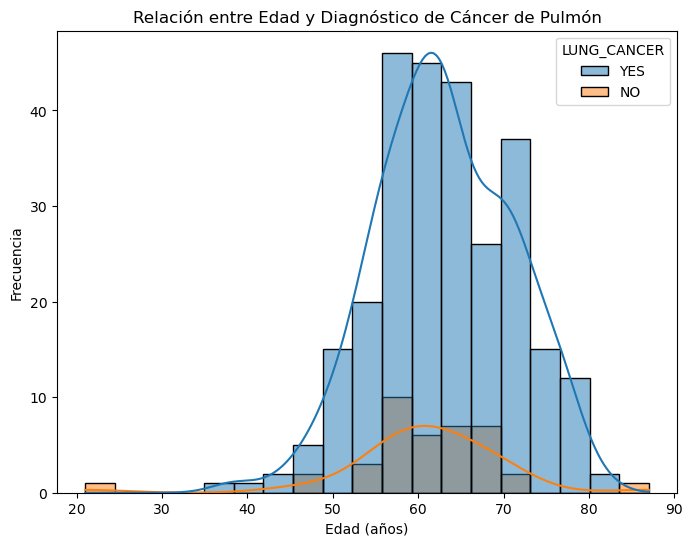

In [5]:
# Visualización de la relación entre edad y diagnóstico de cáncer de pulmón
plt.figure(figsize=(8, 6))
sns.histplot(x='AGE', hue='LUNG_CANCER', data=df, kde=True)
plt.title('Relación entre Edad y Diagnóstico de Cáncer de Pulmón')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.show()

#### Participación por género

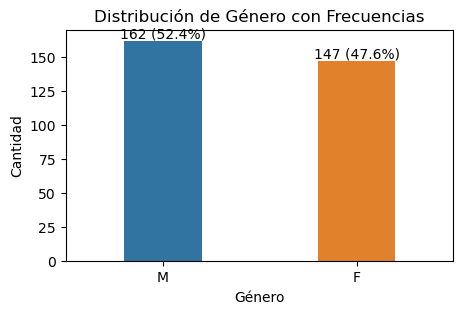

In [6]:
# Visualización de la proporción de género
plt.figure(figsize=(5, 3))
ax = sns.countplot(x='GENDER', data=df, width=0.4)

# Agregar etiquetas de frecuencias
total = len(df['GENDER'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{(height):.0f} ({height/total:.1%})', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.title('Distribución de Género con Frecuencias')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

#### Relación Consumo de Alcohol vs Cáncer de Pulmón

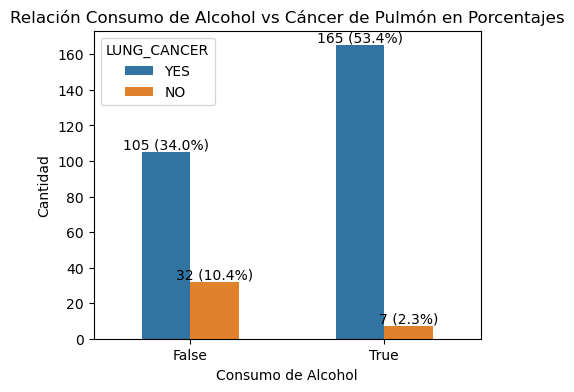

In [7]:
# Matriz de correlaión entre consuo de alcohol con cáncer de pulmón
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='ALCOHOL CONSUMING', hue='LUNG_CANCER', data=df, width=0.5)

# Agregar etiquetas de porcentajes
total = len(df['ALCOHOL CONSUMING'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{(height):.0f} ({height/total:.1%})', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.title('Relación Consumo de Alcohol vs Cáncer de Pulmón en Porcentajes')
plt.xlabel('Consumo de Alcohol')
plt.ylabel('Cantidad')
plt.show()

#### Relación de género vs Cáncer de Pulmón

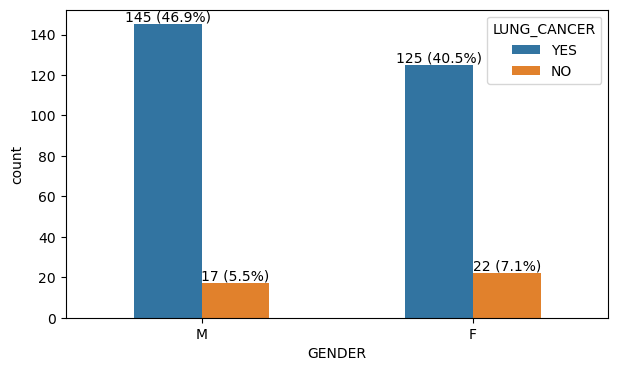

In [8]:
# Visualización de la relación entre género y diagnóstico de cáncer de pulmón
plt.figure(figsize=(7, 4))
ax = sns.countplot(x='GENDER', hue='LUNG_CANCER', data=df, width=0.5)

# Agregar etiquetas de porcentajes
total = len(df['GENDER'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{(height):.0f} ({height/total:.1%})', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

#### Habito de fumar vs Cáncer de Pulmón

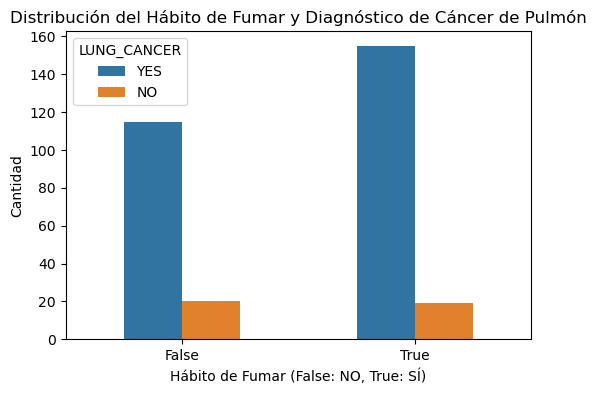

In [9]:
# Visualización de la distribución del hábito de fumar y diagnóstico de cáncer de pulmón
plt.figure(figsize=(6, 4))
sns.countplot(x='SMOKING', hue='LUNG_CANCER', data=df, width=0.5)
plt.title('Distribución del Hábito de Fumar y Diagnóstico de Cáncer de Pulmón')
plt.xlabel('Hábito de Fumar (False: NO, True: SÍ)')
plt.ylabel('Cantidad')
plt.show()

#### Datos atípicos u outliers en la caracerística Edad

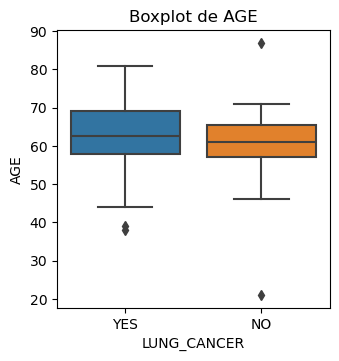

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['AGE']

# Crear subplots para cada columna
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(x='LUNG_CANCER', y=column, data=df)
    plt.title(f'Boxplot de {column}')

plt.tight_layout()
plt.show()

# Preprocesamiento

#### Limpieza de deatos faltantes

In [11]:
# Limpieza de N/A y valores perdidos
df.dropna(inplace=True)
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,False,True,True,False,False,True,False,True,True,True,True,True,True,YES
1,M,74,True,False,False,False,True,True,True,False,False,False,True,True,True,YES
2,F,59,False,False,False,True,False,True,False,True,False,True,True,False,True,NO
3,M,63,True,True,True,False,False,False,False,False,True,False,False,True,True,NO
4,F,63,False,True,False,False,False,False,False,True,False,True,True,False,False,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,False,False,False,True,True,True,False,False,True,True,True,True,False,YES
305,M,70,True,False,False,False,False,True,True,True,True,True,True,False,True,YES
306,M,58,True,False,False,False,False,False,True,True,True,True,False,False,True,YES
307,M,67,True,False,True,False,False,True,True,False,True,True,True,False,True,YES


#### Balanceo de clases por Sobremuestreo (Oversampling)

In [12]:
# Importanción librería imbalanced-learn para balanceo de clases
from imblearn.over_sampling import RandomOverSampler 

X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

# Suponiendo que 'X' son las características y 'y' es la variable objetivo
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

y_resampled.describe()

count     540
unique      2
top       YES
freq      270
Name: LUNG_CANCER, dtype: object

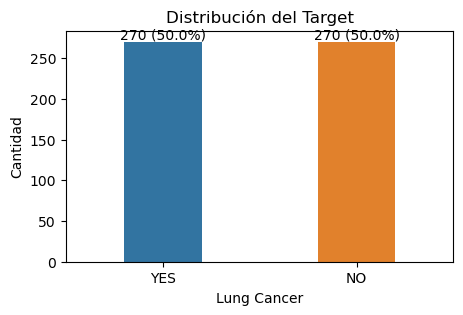

In [13]:
# Visualización de la proporción del target
plt.figure(figsize=(5, 3))
ax = sns.countplot(x=y_resampled, data=df, width=0.4)

# Agregar etiquetas de frecuencias
total = len(y_resampled)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{(height):.0f} ({height/total:.1%})', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.title('Distribución del Target')
plt.xlabel('Lung Cancer')
plt.ylabel('Cantidad')
plt.show()